In [4]:
#Description : This program classifies images

In [5]:
#import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [8]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
#Get the shape of the arrays
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [17]:
#Take a look at the first image
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

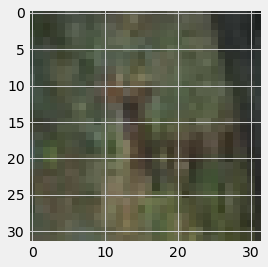

In [18]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [19]:
#Get the image label
print('The image label is: ', y_train[index])

The image label is:  [4]


In [20]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  deer


In [21]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [22]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [23]:
#Print the new label of the current image above
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [24]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

In [26]:
#Create the models architecture
model = Sequential()

#Add the first layer 
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer
model.add( MaxPooling2D(pool_size= (2,2)) )

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') ) 

#Add another pooling layer
model.add( MaxPooling2D(pool_size= (2,2)) )

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add another drop out layer
model.add(Dropout(0.5))

#Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [27]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [29]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 355ms/step - loss: 1.8179 - accuracy: 0.3200 - val_loss: 1.5003 - val_accuracy: 0.4547
Epoch 2/10
157/157 [==============================] - 56s 354ms/step - loss: 1.4461 - accuracy: 0.4712 - val_loss: 1.3536 - val_accuracy: 0.5124
Epoch 3/10
157/157 [==============================] - 56s 354ms/step - loss: 1.2927 - accuracy: 0.5351 - val_loss: 1.1929 - val_accuracy: 0.5749
Epoch 4/10
157/157 [==============================] - 56s 355ms/step - loss: 1.1740 - accuracy: 0.5762 - val_loss: 1.1071 - val_accuracy: 0.6093
Epoch 5/10
157/157 [==============================] - 56s 355ms/step - loss: 1.0915 - accuracy: 0.6107 - val_loss: 1.1143 - val_accuracy: 0.6062
Epoch 6/10
157/157 [==============================] - 56s 354ms/step - loss: 1.0236 - accuracy: 0.6366 - val_loss: 1.0465 - val_accuracy: 0.6294
Epoch 7/10
157/157 [==============================] - 55s 353ms/step - loss: 0.9573 - accuracy: 0.6590 - val_loss: 1.0007 - val_ac

In [30]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 1.0193 - accuracy: 0.6576


0.6575999855995178

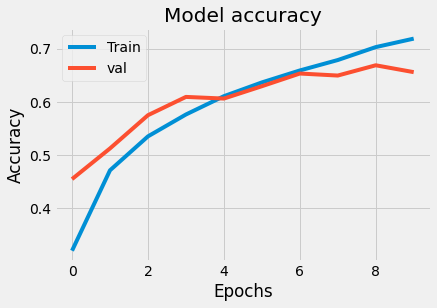

In [32]:
#Vizualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

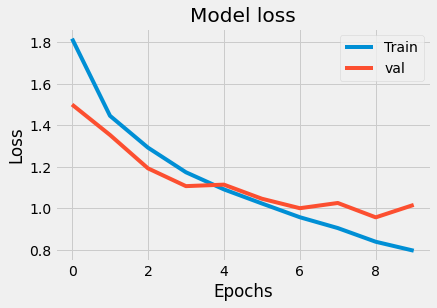

In [34]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [45]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving bird.jpg to bird.jpg


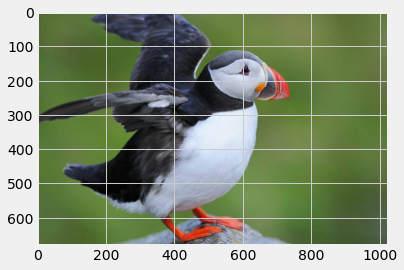

In [46]:
#show the image
new_image = plt.imread('bird.jpg')
img = plt.imshow(new_image)

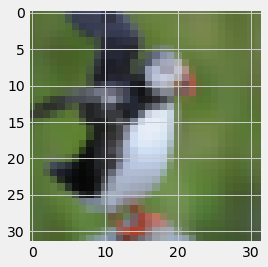

In [47]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [48]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[1.8069324e-03, 7.7921504e-06, 8.2868785e-01, 1.9615062e-02,
        1.9082818e-03, 1.3003336e-01, 8.5731567e-04, 1.7014863e-02,
        1.2503906e-05, 5.6191300e-05]], dtype=float32)

In [49]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[2, 5, 3, 7, 4, 0, 6, 9, 8, 1]


In [50]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

bird : 82.87 %
dog : 13.0 %
cat : 1.96 %
horse : 1.7 %
deer : 0.19 %
